In [49]:
import pandas as pd
import numpy as np
train=pd.read_csv('/content/drive/MyDrive/Datasets/Fraud Detection/fraudTrain.csv')
test=pd.read_csv('/content/drive/MyDrive/Datasets/Fraud Detection/fraudTest.csv')
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [17]:
print(train.columns)
print(test.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [50]:
test=test.drop('Unnamed: 0',axis='columns')
train=train.drop('Unnamed: 0',axis='columns')
train=train.drop('first',axis=1)
train=train.drop('last',axis=1)
train=train.drop('zip',axis=1)
train=train.drop('street',axis=1)
train=train.drop('dob',axis=1)
train=train.drop('merchant',axis=1)
train=train.drop('trans_num',axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train['amt'] = scaler.fit_transform(train[['amt']])

In [55]:
train.head()

,trans_date_trans_time,cc_num,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,-0.407826,0,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,0.230039,0,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,0.934149,1,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,-0.158132,1,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,-0.177094,1,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [53]:
train['gender'] = pd.get_dummies(train['gender'], drop_first=True).astype(int)

In [54]:
train['category'].value_counts()

,count
category,
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758


In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['category']=le.fit_transform(train['category'])

In [57]:
train=train.drop('city',axis=1)

In [58]:
train=train.drop('cc_num',axis=1)

In [59]:
train['job']=le.fit_transform(train['job'])

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  int64  
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  int64  
 3   state       1296675 non-null  int64  
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  int64  
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 118.7 MB


<Axes: >

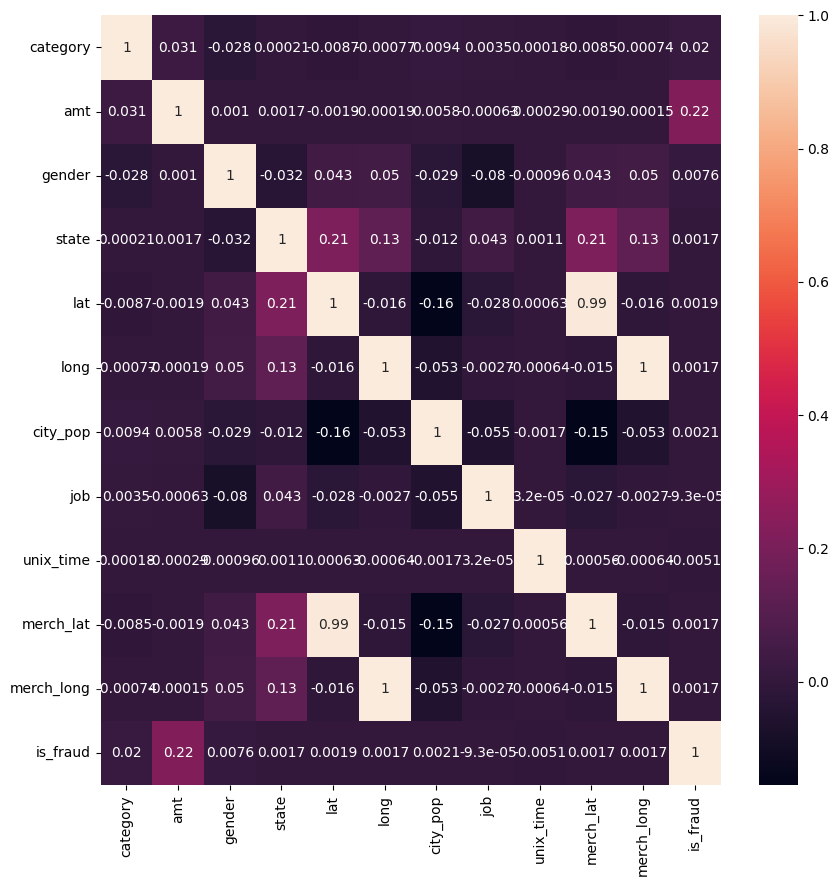

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [80]:
c=train.columns
len(c)

12

In [65]:
xtrain=train.drop('is_fraud',axis=1)
ytrain=train['is_fraud']

In [66]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [67]:
test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [70]:
test=test.drop('first',axis=1)
test=test.drop('last',axis=1)
test=test.drop('zip',axis=1)
test=test.drop('street',axis=1)
test=test.drop('dob',axis=1)
test=test.drop('merchant',axis=1)
test=test.drop('trans_num',axis=1)
test=test.drop('city',axis=1)
test=test.drop('cc_num',axis=1)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test['amt'] = scaler.fit_transform(test[['amt']])

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test['category']=le.fit_transform(test['category'])
test['state']=le.fit_transform(test['state'])
test['job']=le.fit_transform(test['job'])

In [75]:
test['gender'] = pd.get_dummies(test['gender'], drop_first=True).astype(int)

In [77]:
test=test.drop('trans_date_trans_time',axis=1)

In [82]:
xtest=test.drop('is_fraud',axis=1)
ytest=test['is_fraud']

In [83]:
ypred=model.predict(xtest)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9961401355721147

<Axes: >

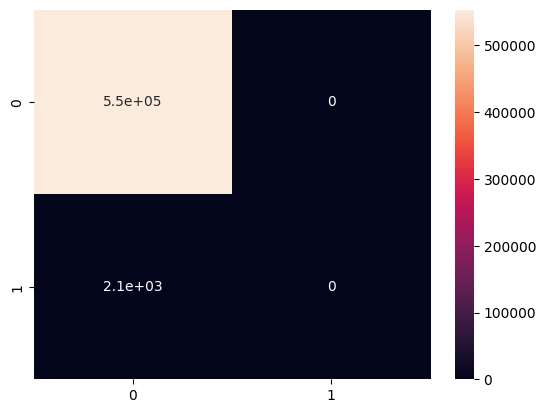

In [85]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,xtrain,ytrain,cv=5)

array([0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99420826])